## Introduction
###Let me start by saying, this is not the best way to classify digits! This notebook is rather meant to be for someone who might not know where to start. As an ml beginner myself, I find it helpful to play with these sorts of commented kernels. Any suggestions for improvement or comments on poor coding practices are appreciated!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

## Loading the data
- We use panda's [read_csv][1]  to read train.csv into a [dataframe][2].
- Then we separate our images and labels for supervised learning. 
- We also do a [train_test_split][3] to break our data into two sets, one for training and one for testing. This let's us measure how well our model was trained by later inputting some known test data.

### For the sake of time, we're only using 5000 images. You should increase or decrease this number to see how it affects model training.


  [1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
  [2]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame
  [3]: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [2]:
labeled_images = pd.read_csv('../input/train.csv')
labeled_images.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:

images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Viewing an Image
- Since the image is currently one-dimension, we load it into a [numpy array][1] and [reshape][2] it so that it is two-dimensional (28x28 pixels)
- Then, we plot the image and label with matplotlib

### You can change the value of variable <i>i</i> to check out other images and labels.


  [1]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html
  [2]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

Text(0.5,1,'6')

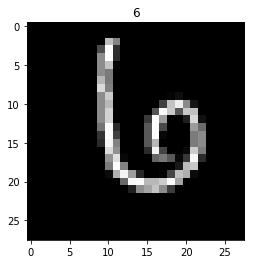

In [4]:
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])



## Examining the Pixel Values
### Note that these images aren't actually black and white (0,1). They are gray-scale (0-255). 
- A [histogram][1] of this image's pixel values shows the range.


  [1]: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

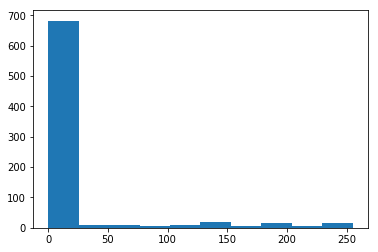

In [5]:
plt.hist(train_images.iloc[i])

## Training our model
- First, we use the [sklearn.svm][1] module to create a [vector classifier][2]. 
- Next, we pass our training images and labels to the classifier's [fit][3] method, which trains our model. 
- Finally, the test images and labels are passed to the [score][4] method to see how well we trained our model. Fit will return a float between 0-1 indicating our accuracy on the test data set

### Try playing with the parameters of svm.SVC to see how the results change. 


  [1]: http://scikit-learn.org/stable/modules/svm.html
  [2]: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
  [3]: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit
  [4]: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score
  [5]: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score

In [6]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)


0.10000000000000001

**## How did our model do?
### You should have gotten around 0.10, or 10% accuracy. This is terrible. 10% accuracy is what get if you randomly guess a number. There are many ways to improve this, including not using a vector classifier, but here's a simple one to start. Let's just simplify our images by making them true black and white.

- To make this easy, any pixel with a value simply becomes 1 and everything else remains 0.
- We'll plot the same image again to see how it looks now that it's black and white. Look at the histogram now.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

Text(0.5,1,'label    6\nName: 3275, dtype: int64')

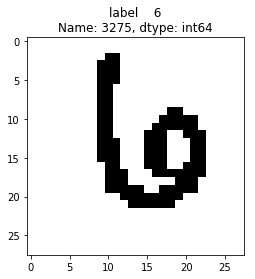

In [7]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

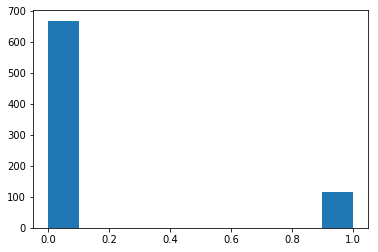

In [8]:
plt.hist(train_images.iloc[i])

## Retraining our model
### We follow the same procedure as before, but now our training and test sets are black and white instead of gray-scale. Our score still isn't great, but it's a huge improvement.

In [9]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.88700000000000001

## Labelling the test data
### Now for those making competition submissions, we can load and predict the unlabeled data from test.csv. Again, for time we're just using the first 5000 images. We then output this data to a results.csv for competition submission.

In [10]:
test_data=pd.read_csv('../input/test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data[0:5000])

In [11]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)